## Louisville Data Analysis 

### Imports
Import pandas, numpy, and matplot

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Set the Dataset Url

In [163]:
url = "https://louisville-metro-opendata-lojic.hub.arcgis.com/datasets/LOJIC::louisville-metro-ky-parks-golf-sales-detail.csv"

### Setup a converter function in order to filter out non-selling items

In [165]:
def convert_num(x):
    try:
        x = np.float64(x)
        return x
    except:
        return np.nan

### Read in the dataset

In [167]:
df = pd.read_csv(url,converters={"ActualPrice": convert_num, "Quantity": convert_num, "SalesTax": convert_num}, dtype={"ObjectId": int, "CourseID": int, "CourseName": "string", "SaleID": int, "ItemID": int, "ItemDescription": "string", "LMPField": "string"}, parse_dates=["SaleDate","ReportDate"])

### Create a new sales column

In [168]:
df["Sales"] = df["ActualPrice"] * df["Quantity"]
df.head()

,ObjectId,CourseID,CourseName,SaleID,SaleDate,ReportDate,ItemID,ItemDescription,ActualPrice,Quantity,SalesTax,LMPField,Sales
0,1,16,Seneca Golf Course,2540511,2015-12-26 12:24:59+00:00,2015-12-26 05:00:00+00:00,2738,WE Annual Green Fee,4.0,1.0,0.0,AdultFeeWAnnual,4.0
1,2,16,Seneca Golf Course,2540511,2015-12-26 12:24:59+00:00,2015-12-26 05:00:00+00:00,3370,Coffee,1.0,1.0,0.0,Food,1.0
2,3,16,Seneca Golf Course,2540512,2015-12-26 12:27:00+00:00,2015-12-26 05:00:00+00:00,3395,Tees - 50 Pack,3.0,1.0,0.0,Merchandise,3.0
3,4,16,Seneca Golf Course,2540513,2015-12-26 12:33:59+00:00,2015-12-26 05:00:00+00:00,3376,Crackers,0.0,1.0,0.0,Food,0.0
4,5,16,Seneca Golf Course,2540513,2015-12-26 12:33:59+00:00,2015-12-26 05:00:00+00:00,3370,Coffee,1.0,1.0,0.0,Food,1.0


### Determine total sales

In [187]:
df["Sales"].sum()

2305320.0

### Determine which products sold the most by quanity

In [185]:
df_group = df.groupby("ItemID").sum("Quantity").sort_values("Quantity", ascending=False)[["Quantity"]]
df_group.head(10)

,Quantity
ItemID,
3454,13580.0
3380,7623.0
3680,7166.0
3356,5224.0
2746,4986.0
2032,4814.0
2741,4692.0
11544,4438.0
2102,3958.0


### Sales Trends by Month

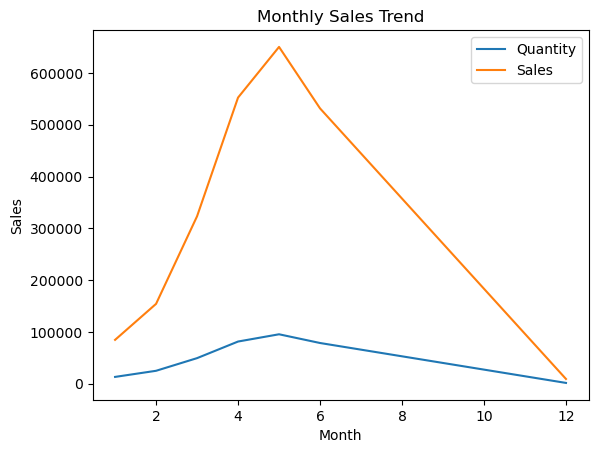

In [191]:
df['Year'] = df['SaleDate'].dt.year
df['Month'] = df['SaleDate'].dt.month
df['Day']  = df['SaleDate'].dt.day
ax = df[['Month', 'Quantity', 'Sales']].groupby('Month').sum().plot(
                                                                 title='Monthly Sales Trend', 
                                                                 ylabel='Sales',
                                                                 );